In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import drive
np.random.seed(42)

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!cp -r "gdrive/My Drive/Colab Notebooks/Xenete Fraud Detection/" sample_data/data

In [0]:
path_to_folder = 'sample_data/data/'

In [0]:
data = pd.read_csv(path_to_folder + 'training.csv')
test = pd.read_csv(path_to_folder + 'test.csv')

In [0]:
test = test.drop(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'PricingStrategy', 'CurrencyCode', 'CountryCode', 'ProductCategory', 'ProductId', 'ProviderId'], axis = 1)
data = data.drop(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'PricingStrategy', 'CurrencyCode', 'CountryCode', 'ProductCategory', 'ProductId', 'ProviderId'], axis = 1)

In [320]:
data.head()

,ChannelId,Amount,Value,TransactionStartTime,FraudResult
0,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,0
1,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,0
2,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,0
3,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,0
4,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,0


In [321]:
row1 = {'ChannelId':'ChannelId_4'	, 'Amount':97, 
           'Value': 22, 'TransactionStartTime':'2018-11-15T02:18:49Z', 'FraudResult' : 0}
'''row2 = {'ProviderId':'ProviderId_4', 'ProductId':'ProductId_18', 'ProductCategory': 'airtime', 'ChannelId':'ChannelId_4'	, 'Amount':97, 
           'Value': 22, 'TransactionStartTime':'2018-11-15T02:18:49Z', 'PricingStrategy': 2, 'FraudResult' : 0}
row3 = {'ProviderId':'ProviderId_4', 'ProductId':'ProductId_25', 'ProductCategory': 'airtime', 'ChannelId':'ChannelId_4'	, 'Amount':97, 
           'Value': 22, 'TransactionStartTime':'2018-11-15T02:18:49Z', 'PricingStrategy': 2, 'FraudResult' : 0}
row4 = {'ProviderId':'ProviderId_4', 'ProductId':'ProductId_26', 'ProductCategory': 'airtime', 'ChannelId':'ChannelId_4'	, 'Amount':97, 
           'Value': 22, 'TransactionStartTime':'2018-11-15T02:18:49Z', 'PricingStrategy': 2, 'FraudResult' : 0}
row5 = {'ProviderId':'ProviderId_4', 'ProductId':'ProductId_12', 'ProductCategory': 'airtime', 'ChannelId':'ChannelId_4'	, 'Amount':97, 
           'Value': 22, 'TransactionStartTime':'2018-11-15T02:18:49Z', 'PricingStrategy': 2}'''
#append row to the dataframe
data = data.append(row1, ignore_index=True)
'''data = data.append(row2, ignore_index=True)
data = data.append(row3, ignore_index=True)
data = data.append(row4, ignore_index=True)
test = test.append(row5, ignore_index=True)'''

'data = data.append(row2, ignore_index=True)\ndata = data.append(row3, ignore_index=True)\ndata = data.append(row4, ignore_index=True)\ntest = test.append(row5, ignore_index=True)'

In [322]:
test.shape , data.shape

((45019, 4), (95663, 5))

In [0]:
time = data.TransactionStartTime
timet = test.TransactionStartTime

In [0]:
time = pd.to_datetime(time)
timet = pd.to_datetime(timet)

In [325]:
#data["hour"] = time.dt.hour
'''data["minute"] = time.dt.minute
data["month"] = time.dt.month
data["dat"] = time.dt.day'''

#test["hour"] = timet.dt.hour
'''test["minute"] = timet.dt.minute
test["month"] = timet.dt.month
test["dat"] = timet.dt.day'''

'test["minute"] = timet.dt.minute\ntest["month"] = timet.dt.month\ntest["dat"] = timet.dt.day'

In [0]:
data = data.drop(['TransactionStartTime'], axis = 1)
test = test.drop(['TransactionStartTime'], axis = 1)

In [327]:
'''data['ProviderId'] = data['ProviderId'].str.split("_", n = 2, expand = True)[1].astype(int)
data['ProductId'] = data['ProductId'].str.split("_", n = 2, expand = True)[1].astype(int)
data['ChannelId'] = data['ChannelId'].str.split("_", n = 2, expand = True)[1].astype(int)
data['PricingStrategy'] = 'Pricing_' + data['PricingStrategy'].astype(str)

test['ProviderId'] = test['ProviderId'].str.split("_", n = 2, expand = True)[1].astype(int)
test['ProductId'] = test['ProductId'].str.split("_", n = 2, expand = True)[1].astype(int)
test['ChannelId'] = test['ChannelId'].str.split("_", n = 2, expand = True)[1].astype(int)
test['PricingStrategy'] = 'Pricing_' + test['PricingStrategy'].astype(str)'''

'data[\'ProviderId\'] = data[\'ProviderId\'].str.split("_", n = 2, expand = True)[1].astype(int)\ndata[\'ProductId\'] = data[\'ProductId\'].str.split("_", n = 2, expand = True)[1].astype(int)\ndata[\'ChannelId\'] = data[\'ChannelId\'].str.split("_", n = 2, expand = True)[1].astype(int)\ndata[\'PricingStrategy\'] = \'Pricing_\' + data[\'PricingStrategy\'].astype(str)\n\ntest[\'ProviderId\'] = test[\'ProviderId\'].str.split("_", n = 2, expand = True)[1].astype(int)\ntest[\'ProductId\'] = test[\'ProductId\'].str.split("_", n = 2, expand = True)[1].astype(int)\ntest[\'ChannelId\'] = test[\'ChannelId\'].str.split("_", n = 2, expand = True)[1].astype(int)\ntest[\'PricingStrategy\'] = \'Pricing_\' + test[\'PricingStrategy\'].astype(str)'

In [0]:
data = pd.get_dummies(data, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [329]:
test.head()

,Amount,Value,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_4,ChannelId_ChannelId_5
0,1000.0,1000,0,1,0,0
1,2000.0,2000,0,1,0,0
2,-50.0,50,1,0,0,0
3,3000.0,3000,0,1,0,0
4,-60.0,60,1,0,0,0


In [330]:
data.head()

,Amount,Value,FraudResult,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_4,ChannelId_ChannelId_5
0,1000.0,1000,0,0,1,0,0
1,-20.0,20,0,1,0,0,0
2,500.0,500,0,0,1,0,0
3,20000.0,21800,0,0,1,0,0
4,-644.0,644,0,1,0,0,0


# Model Building

In [0]:
X = data.iloc[:, data.columns != 'FraudResult']
y = data.iloc[:, data.columns == 'FraudResult']

In [332]:
from sklearn.preprocessing import StandardScaler
amount =  StandardScaler()
hour =  StandardScaler()
value =  StandardScaler()
X['Amount'] = amount.fit_transform(X['Amount'].values.reshape(-1, 1))
X['Value'] = hour.fit_transform(X['Value'].values.reshape(-1, 1))
#X['hour'] = value.fit_transform(X['hour'].values.reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
test['Amount'] = amount.transform(test['Amount'].values.reshape(-1, 1))
test['Value'] = hour.transform(test['Value'].values.reshape(-1, 1))
#test['hour'] = value.transform(test['hour'].values.reshape(-1, 1))

In [334]:
X.head()

,Amount,Value,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_4,ChannelId_ChannelId_5
0,-0.046371,-0.072291,0,1,0,0
1,-0.054643,-0.080250,1,0,0,0
2,-0.050426,-0.076352,0,1,0,0
3,0.107718,0.096649,0,1,0,0
4,-0.059704,-0.075182,1,0,0,0


In [335]:
'''X = X.drop('hour', axis = 1)
test = test.drop('hour', axis = 1)'''

"X = X.drop('hour', axis = 1)\ntest = test.drop('hour', axis = 1)"

In [0]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 22)

In [0]:
# Standerdise the dataset
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
test = scaler.fit_transform(test)

In [0]:
# making evaluation
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
def evaluate(clf):
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print("The Scores for {} are: Accuracy of {}, F1 of {} and CM".format(type(clf).__name__, accuracy, f1))
    sns.heatmap(cm, annot = True , fmt='g')

In [338]:
# building first model
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(solver = 'lbfgs')
clf_lr.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The Scores for LogisticRegression are: Accuracy of 0.9980835569183595, F1 of 0.3820224719101123 and CM


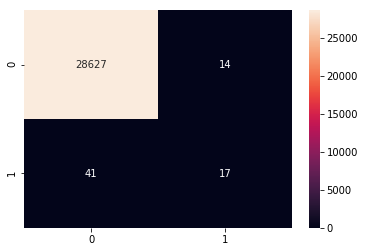

In [339]:
evaluate(clf_lr)

In [0]:
from sklearn.svm import SVC
clf_svm = SVC(class_weight = 'balanced')
clf_svm.fit(x_train, y_train)

In [349]:
from sklearn.svm import SVC
clf_svm2 = SVC(gamma='auto', kernel = 'rbf')
clf_svm2.fit(x_train, y_train.values.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

The Scores for SVC are: Accuracy of 0.9995470225443395, F1 of 0.8761904761904762 and CM


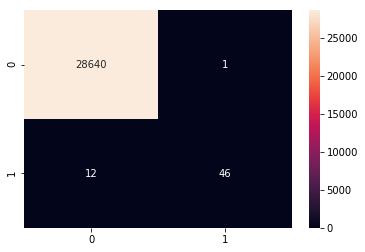

In [350]:
evaluate(clf_svm2)

In [378]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(8, n_jobs = -1)
clf_knn.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
                     weights='uniform')

The Scores for KNeighborsClassifier are: Accuracy of 0.9996167113836719, F1 of 0.8952380952380952 and CM


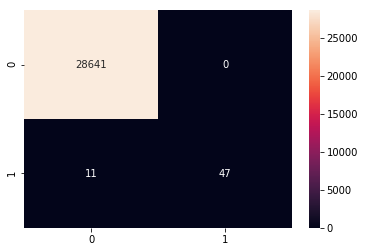

In [379]:
evaluate(clf_knn)

In [382]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(criterion='entropy')
clf_dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

The Scores for DecisionTreeClassifier are: Accuracy of 0.9996167113836719, F1 of 0.8952380952380952 and CM


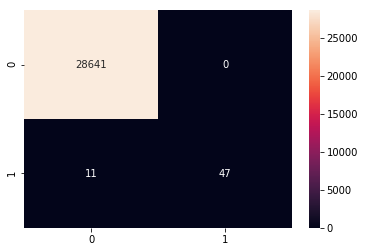

In [383]:
evaluate(clf_dt)

In [0]:
cw = {0 : 0.4 , 1 : 0.7}


In [506]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators = 100)
clf_rf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

The Scores for RandomForestClassifier are: Accuracy of 0.9995818669640057, F1 of 0.8846153846153846 and CM


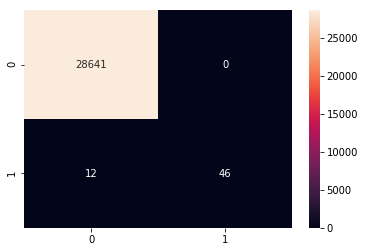

In [507]:
evaluate(clf_rf)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [277]:
model = Sequential([
    Dense(units=128, input_dim = x_train.shape[1],activation='relu'),
    Dense(units=128,activation='relu'),
    Dropout(0.2),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(1,activation='sigmoid'),
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 128)               1024      
_________________________________________________________________
dense_30 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_23 (Dropout)         (None, 256)               0         
__________

In [409]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced' ,np.unique(y_train) ,y_train.values.ravel())
class_weights

array([  0.50101004, 248.01481481])

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X,y,batch_size=64,epochs=100)

The Scores for DNN are: Accuracy of 0.9978396459806962, F1 of 0.0 and CM


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


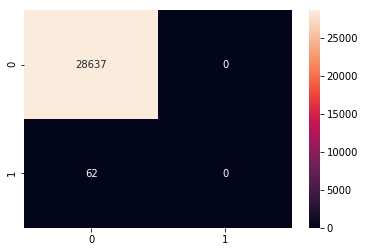

In [60]:
y_pred = np.round(model.predict(x_test))
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("The Scores for {} are: Accuracy of {}, F1 of {} and CM".format("DNN", accuracy, f1))
sns.heatmap(cm, annot = True , fmt='g')

# Submission

In [0]:
testData = pd.read_csv(path_to_folder+'test.csv')

In [0]:
test.head()

In [0]:
ids = testData.TransactionId
prediction = clf_rf.predict(test)
all_data = list(zip(ids, prediction.reshape(1,-1)[0].astype('int32')))

In [511]:
final_result = pd.DataFrame(all_data, columns=['TransactionId', 'FraudResult'])
final_result.to_csv('rf_new_6.csv', index =False)
final_result.head()

,TransactionId,FraudResult
0,TransactionId_50600,0
1,TransactionId_95109,0
2,TransactionId_47357,0
3,TransactionId_28185,0
4,TransactionId_22140,0
